# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
df_car_price=pd.read_csv("CarPrice_Assignment.csv")
df_car_price.isnull().sum()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [2]:
df_car_price_X=df_car_price[["symboling","carheight","enginesize","wheelbase",	"carlength","carwidth",	"carheight",	"curbweight","enginesize"	,	"boreratio",	"stroke",	"compressionratio",	"horsepower",	"peakrpm",	"citympg",	"highwaympg"]]
df_car_price_Y=df_car_price["price"]

train_X,train_Y = df_car_price_X.iloc[:102],df_car_price_Y.iloc[:102]
train_X=(train_X-train_X.mean())/train_X.std()
train_Y=(train_Y-train_Y.mean())/train_Y.std()

validate_X, validate_Y =df_car_price_X.iloc[102:163],df_car_price_Y.iloc[102:163]
validate_X=(validate_X-train_X.mean())/train_X.std()
validate_Y=(validate_Y-train_Y.mean())/train_Y.std()

test_X, test_Y = df_car_price_X.iloc[163:],df_car_price_Y.iloc[163:]
test_X=(test_X-train_X.mean())/train_X.std()
test_Y=(test_Y-train_Y.mean())/train_Y.std()



In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

model = Sequential()
model.add(Dense(10, input_shape = (train_X.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                170       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


In [4]:
import tensorflow as tf
model.compile(loss='mean_squared_error', optimizer="rmsprop",metrics = ("accuracy"))
price=model.fit(train_X, train_Y, 
	validation_data=(validate_X, validate_Y),
	epochs=100, batch_size=1)

Epoch 1/100
102/102 [==============================] - 2s 7ms/step - loss: 0.5922 - accuracy: 0.0000e+00 - val_loss: 231635216.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.0000e+00 - val_loss: 230159616.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.1810 - accuracy: 0.0000e+00 - val_loss: 227480800.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.0000e+00 - val_loss: 224989936.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.0000e+00 - val_loss: 222500496.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.0000e+00 - val_loss: 220735872.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
102/102 [=========================

In [5]:
price.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [6]:
e= price.history
ef=pd.DataFrame(e)
ef

,loss,accuracy,val_loss,val_accuracy
0,0.633390,0.0,231635216.0,0.0
1,0.372575,0.0,230159616.0,0.0
2,0.194383,0.0,227480800.0,0.0
3,0.124153,0.0,224989936.0,0.0
4,0.111360,0.0,222500496.0,0.0
...,...,...,...,...
95,0.038032,0.0,220800320.0,0.0
96,0.038089,0.0,220617760.0,0.0
97,0.038131,0.0,219976736.0,0.0
98,0.039724,0.0,219813552.0,0.0


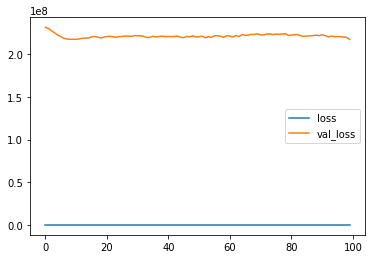

In [7]:
ef.plot( y = ['loss', 'val_loss'])

2/2 [==============================] - 0s 8ms/step - loss: 188675680.0000 - accuracy: 0.0000e+00


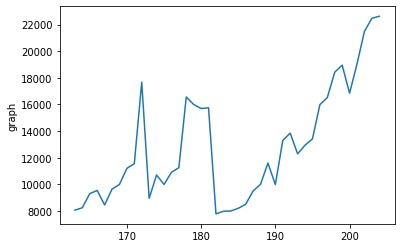

In [8]:
import matplotlib.pyplot as plt

model.evaluate(test_X,test_Y)
plt.plot(test_Y)
plt.ylabel('graph')
plt.show()

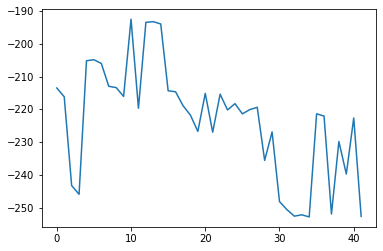

In [10]:
plt.plot(model.predict(test_X))
plt.show()